In [1]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
mongo = client.hai

In [26]:
import time

start_time = int(time.time()) - 3600*10
end_time = int(time.time())
username = "sean"

In [3]:
query = {"user_name": username, "pose":{"$exists": True}, "detections":{"$exists": True}, "time": {"$gt": start_time, "$lt": time.time()}}
cams = mongo.images.find(query).distinct("cam_id")
print(cams)
cams = ['nakacam0', 'nakacam1']

['webcam0', 'nakacam0', 'nakacam1']


In [4]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

In [49]:
%load_ext autoreload
%autoreload 2
from controllers.dbreader.imagereader import ImageReader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
imreader = ImageReader()
imdata = imreader.read_db(username, start_time, end_time, cams)

In [51]:
len(imdata)

2508

In [53]:
from controllers.vectorizer.person2vec import Person2Vec
data2vec = Person2Vec()
x_mat = data2vec.vectorize(imdata)

In [54]:
x_mat.shape

(2508, 108)


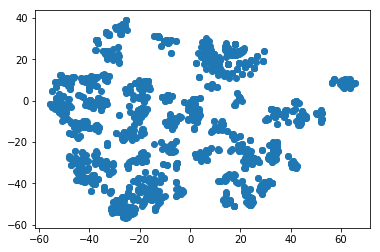

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot(x):
    pca = PCA(n_components=50)
    tsne = TSNE(n_components=2)
    x = StandardScaler().fit_transform(x)
    x = pca.fit_transform(x)
    x = tsne.fit_transform(x)
    #for t in range(start_time, end_time, 3600):
    #cond = np.where(np.logical_and(time_data2>t, time_data2<=t+3600))
    #plt.scatter(x[cond,0],x[cond,1], label=t)
    plt.scatter(x[:,0], x[:, 1])
    plt.show()
    
plot(x_mat)